*** 
<center><img src="https://cdn0.iconfinder.com/data/icons/school-medicine-people-1/110/Student-3-512.png" width=70 height=70 /></center>
<h1><center>Student Academic Success</center></h1>

**About the Dataset:**

"A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success" (UC Irvine Machine Learning Repository).

**Goal:**

The goal of this competition is to predict academic risk of students in higher education.
***

In [282]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, stats
#import researchpy as rp

In [283]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [284]:
# Read the data
train_df=pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv", index_col=[0])
test_df=pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv", index_col=[0])
train_df_viz=pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv", index_col=[0])


pd.set_option('display.max_columns',None)

***
# Decoding the data for the purpose of EDA

#### Data Dictionary Reference

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [285]:
labels_txt = {
    
  'Marital status': {1:'single', 2:'married', 3:'widower', 4:'divorced', 5:'facto union', 6:'legally separated'},

  'Application mode':{1:'1st phase - general contingent', 2:'Ordinance No. 612/93', 5:'1st phase - special contingent (Azores Island)',
                        7:'Holders of other higher courses', 10:'Ordinance No. 854-B/99', 15:'International student (bachelor)',\
                        16:'1st phase - special contingent (Madeira Island)', 17:'2nd phase - general contingent',\
                        18:'3rd phase - general contingent', 26:'Ordinance No. 533-A/99, item b2) (Different Plan)',\
                        27:'Ordinance No. 533-A/99, item b3 (Other Institution)', 39:'Over 23 years old', 42:'Transfer',\
                        43:'Change of course', 44:'Technological specialization diploma holders', 51:'Change of institution/course',\
                        53:'Short cycle diploma holders', 57:'Change of institution/course (International)'},

    'Course':{33:'Biofuel Production Technologies', 171:'Animation and Multimedia Design', 8014:'Social Service (evening attendance)',\
              9003:'Agronomy', 9070:'Communication Design', 9085:'Veterinary Nursing', 9119:'Informatics Engineering', 9130:'Equinculture',\
              9147:'Management', 9238:'Social Service', 9254:'Tourism', 9500:'Nursing', 9556:'Oral Hygiene', 9670:'Advertising and Marketing Management',\
              9773:'Journalism and Communication', 9853:'Basic Education', 9991:'Management (evening attendance)'},

    'Daytime/evening attendance':{1:'daytime', 0:'evening'},

    'Previous qualification': {1:'Secondary education', 2:"Higher education - bachelor's degree", 3:'Higher education - degree',\
                              4:"Higher education - master's", 5:'Higher education - doctorate', 6:'Frequency of higher education',\
                              9:'12th year of schooling - not completed', 10:'11th year of schooling - not completed',\
                              12:'Other - 11th year of schooling', 14:'10th year of schooling', 15:'10th year of schooling - not completed',\
                              19:'Basic education 3rd cycle (9th/10th/11th year) or equiv.', 38:'Basic education 2nd cycle (6th/7th/8th year) or equiv.',\
                              39:'Technological specialization course', 40:'Higher education - degree (1st cycle)', 42:'Professional higher technical course',\
                              43:'Higher education - master (2nd cycle)'},

    'Nacionality': {1:'Portuguese', 2:'German', 6:'Spanish', 11:'Italian', 13:'Dutch', 14:'English', 17:'Lithuanian', 21:'Angolan',\
                   22:'Cape Verdean', 24:'Guinean', 25:'Mozambican', 26:'Santomean', 32:'Turkish', 41:'Brazilian', 62:'Romanian',\
                   100:'Moldova (Republic of)', 101:'Mexican', 103:'Ukrainian', 105:'Russian', 108:'Cuban', 109:'Colombian'},

    "Mother's qualification": {1:'Secondary Education - 12th Year of Schooling or Eq.', 2:"Higher Education - Bachelor's Degree",\
                             3:'Higher Education - Degree', 4:"Higher Education - Master's", 5:'Higher Education - Doctorate',\
                             6:'Frequency of Higher Education', 9:'12th Year of Schooling - Not Completed', 10:'11th Year of Schooling - Not Completed',\
                             11:'7th Year (Old)', 12:'Other - 11th Year of Schooling', 14:'10th Year of Schooling', 18:'General commerce course',\
                             19:'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 22:'Technical-professional course', 26:'7th year of schooling',\
                             27:'2nd cycle of the general high school course', 29:'9th Year of Schooling - Not Completed', 30:'8th year of schooling',\
                             34:'Unknown', 35:"Can't read or write", 36:'Can read without having a 4th year of schooling', 37:'Basic education 1st cycle (4th/5th year) or equiv.',\
                             38:'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 39:'Technological specialization course',\
                             40:'Higher education - degree (1st cycle)', 41:'Specialized higher studies course', 42:'Professional higher technical course',\
                             43:'Higher Education - Master (2nd cycle)', 44:'Higher Education - Doctorate (3rd cycle)'},


    "Father's qualification": {1:'Secondary Education - 12th Year of Schooling or Eq.', 2:"Higher Education - Bachelor's Degree",\
                             3:'Higher Education - Degree', 4:"Higher Education - Master's", 5:'Higher Education - Doctorate',\
                             6:'Frequency of Higher Education', 9:'12th Year of Schooling - Not Completed', 10:'11th Year of Schooling - Not Completed',\
                             11:'7th Year (Old)', 12:'Other - 11th Year of Schooling', 14:'10th Year of Schooling', 18:'General commerce course',\
                             19:'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 22:'Technical-professional course', 26:'7th year of schooling',\
                             27:'2nd cycle of the general high school course', 29:'9th Year of Schooling - Not Completed', 30:'8th year of schooling',\
                             34:'Unknown', 35:"Can't read or write", 36:'Can read without having a 4th year of schooling', 37:'Basic education 1st cycle (4th/5th year) or equiv.',\
                             38:'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 39:'Technological specialization course',\
                             40:'Higher education - degree (1st cycle)', 41:'Specialized higher studies course', 42:'Professional higher technical course',\
                             43:'Higher Education - Master (2nd cycle)', 44:'Higher Education - Doctorate (3rd cycle)'

    },
    "Mother's occupation": {0:'Student', 1:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',\
                          2:'Specialists in Intellectual and Scientific Activities', 3:'Intermediate Level Technicians and Professions',\
                          4:'Administrative staff', 5:'Personal Services, Security and Safety Workers and Sellers', 6:'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',\
                          7:'Skilled Workers in Industry, Construction and Craftsmen', 8:'Installation and Machine Operators and Assembly Workers',
                          9:'Unskilled Workers', 10:'Armed Forces Professions', 90:'Other Situation', 99:'(blank)', 122 :'Health professionals',
                          123:'teachers', 125:'Specialists in information and communication technologies (ICT)', 131:'Intermediate level science and engineering technicians and professions',\
                          132:'Technicians and professionals, of intermediate level of health', 134:'Intermediate level technicians from legal, social, sports, cultural and similar services',\
                          141:'Office workers, secretaries in general and data processing operators', 143:'Data, accounting, statistical, financial services and registry-related operators',\
                          144:'Other administrative support staff', 151:'personal service workers', 152:'sellers', 153:'Personal care workers and the like', \
                          171:'Skilled construction workers and the like, except electricians', 173:'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
                          175:'Workers in food processing, woodworking, clothing and other industries and crafts', 191:'cleaning workers',\
                          192:'Unskilled workers in agriculture, animal production, fisheries and forestry', 193:'Unskilled workers in extractive industry, construction, manufacturing and transport',\
                          194:'Meal preparation assistants'},

  "Father's occupation": {0:'Student', 1:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',\
                          2:'Specialists in Intellectual and Scientific Activities', 3:'Intermediate Level Technicians and Professions',\
                          4:'Administrative staff', 5:'Personal Services, Security and Safety Workers and Sellers', 6:'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',\
                          7:'Skilled Workers in Industry, Construction and Craftsmen', 8:'Installation and Machine Operators and Assembly Workers',
                          9:'Unskilled Workers', 10:'Armed Forces Professions', 90:'Other Situation', 99:'(blank)', 122 :'Health professionals',
                          123:'teachers', 125:'Specialists in information and communication technologies (ICT)', 131:'Intermediate level science and engineering technicians and professions',\
                          132:'Technicians and professionals, of intermediate level of health', 134:'Intermediate level technicians from legal, social, sports, cultural and similar services',\
                          141:'Office workers, secretaries in general and data processing operators', 143:'Data, accounting, statistical, financial services and registry-related operators',\
                          144:'Other administrative support staff', 151:'personal service workers', 152:'sellers', 153:'Personal care workers and the like', \
                          171:'Skilled construction workers and the like, except electricians', 173:'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
                          175:'Workers in food processing, woodworking, clothing and other industries and crafts', 191:'cleaning workers',\
                          192:'Unskilled workers in agriculture, animal production, fisheries and forestry', 193:'Unskilled workers in extractive industry, construction, manufacturing and transport',\
                          194:'Meal preparation assistants'},
    
    'Displaced': {1:'yes', 0:'no'},

    'Educational special needs':{1:'yes', 0:'no'},

    'Debtor':{1:'yes', 0:'no'},

    'Tuition fees up to date':{1:'yes', 0:'no'},

    'Gender': {1:'male', 0:'female'},    

    'Scholarship holder':{1:'yes', 0:'no'},

    'International':{1:'yes', 0:'no'}
}

* ## Label Decoding

In [286]:
# labeling the data based on the labels_txt dictionary
for num, label in labels_txt.items():
    for col in train_df_viz.columns:
        if col in num:
            train_df_viz[col] = train_df_viz[col].replace(label)  

In [287]:
# label the unmatched data as unknown
for index, row in train_df_viz.iterrows():
    for col in labels_txt.keys():
        if str(row[col]).isdigit():
            train_df_viz[col] = train_df_viz[col].replace('Unknown')  

In [12]:
# Grouping the age
#train_df_viz['Age group'] = ['< 20' if age < 20 else '20 - 29' if age < 30 else '30 - 39' if age < 40 else '40 - 49' \
#                             if age < 50 else '> 49' for age in train_df_viz['Age at enrollment']]

# Grouping the Marital status
#train_df_viz['Marital status group'] = np.where(train_df_viz['Marital status'] == 'single','single', \
#                                 np.where(train_df_viz['Marital status'] == 'married','married','other'))

In [39]:
# Save to a csv file
#train_df_viz.to_csv('train_df_viz.csv')

# Exploratory Data Analysis
***

In [288]:
# Resulted dataset
train_df_viz.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,single,1st phase - general contingent,1,Social Service,daytime,Secondary education,126.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic Education 3rd Cycle (9th/10th/11th Year)...,"Personal Services, Security and Safety Workers...","Personal Services, Security and Safety Workers...",122.6,no,no,no,yes,female,yes,18,no,0,6,6,6,14.5,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,single,2nd phase - general contingent,1,Social Service,daytime,Secondary education,125.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,Unskilled Workers,119.8,yes,no,no,yes,female,no,18,no,0,6,8,4,11.6,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout


In [289]:
# Checking the shape of the data
print(f'Training Set shape: {train_df.shape}')
print(f'Testing Set shape: {test_df.shape}')
print(f'Training Set %: {(len(train_df) / (len(train_df) + len(test_df)) * 100):.2f}')
print(f'Testing Set %: {(len(test_df) / (len(test_df) + len(train_df)) * 100):.2f}')

Training Set shape: (76518, 37)
Testing Set shape: (51012, 36)
Training Set %: 60.00
Testing Set %: 40.00


In [290]:
# Checking the datatypes
train_df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  object 
 1   Application mode                                76518 non-null  object 
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  object 
 4   Daytime/evening attendance                      76518 non-null  object 
 5   Previous qualification                          76518 non-null  object 
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  object 
 8   Mother's qualification                          76518 non-null  object 
 9   Father's qualification                      

In [291]:
# Checking for missing values
train_df_viz.isna().sum().sum()

0

In [292]:
# Descriptive stats
train_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Marital status,76518.0,1.11,0.44,1.00,1.00,1.00,1.00,6.00
Application mode,76518.0,16.05,16.68,1.00,1.00,17.00,39.00,53.00
Application order,76518.0,1.64,1.23,0.00,1.00,1.00,2.00,9.00
Course,76518.0,9001.29,1803.44,33.00,9119.00,9254.00,9670.00,9991.00
Daytime/evening attendance,76518.0,0.92,0.28,0.00,1.00,1.00,1.00,1.00
Previous qualification,76518.0,3.66,8.62,1.00,1.00,1.00,1.00,43.00
Previous qualification (grade),76518.0,132.38,11.00,95.00,125.00,133.10,140.00,190.00
Nacionality,76518.0,1.23,3.39,1.00,1.00,1.00,1.00,109.00
Mother's qualification,76518.0,19.84,15.40,1.00,1.00,19.00,37.00,44.00
Father's qualification,76518.0,23.43,14.92,1.00,4.00,19.00,37.00,44.00


In [293]:
# Categorical variables
categorical_var = list(train_df_viz.select_dtypes('object').columns)

# Continous Variables
continous_var = list(train_df_viz.select_dtypes(['float64']).columns)

# Discrete Variables
discrete_var = list(train_df_viz.select_dtypes(['int64']).columns)

* ## Distribution - Numerical variables

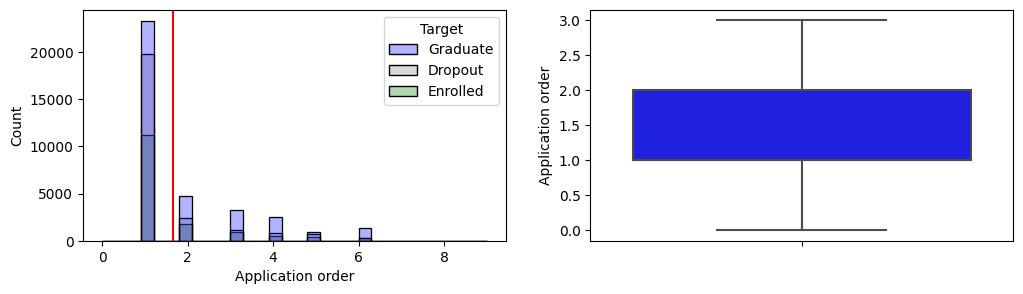

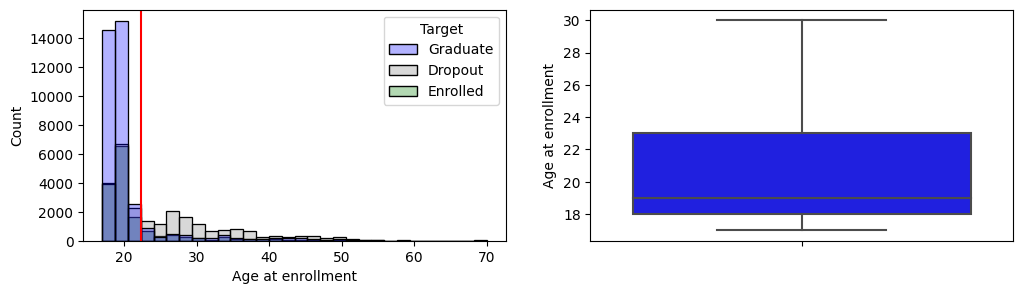

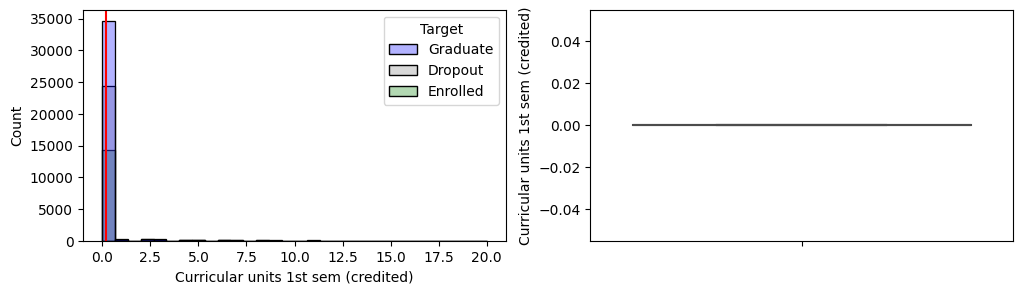

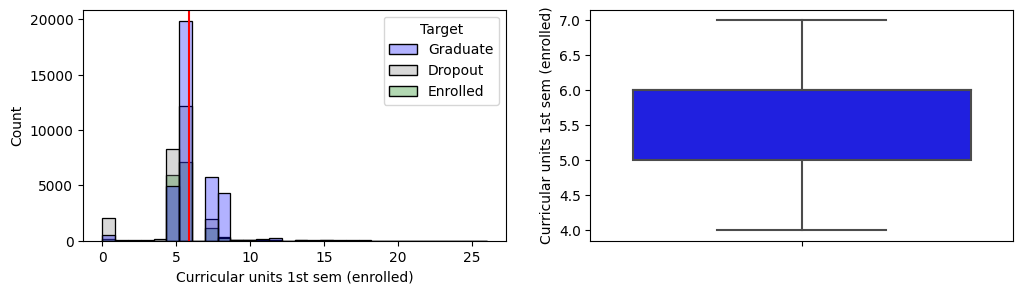

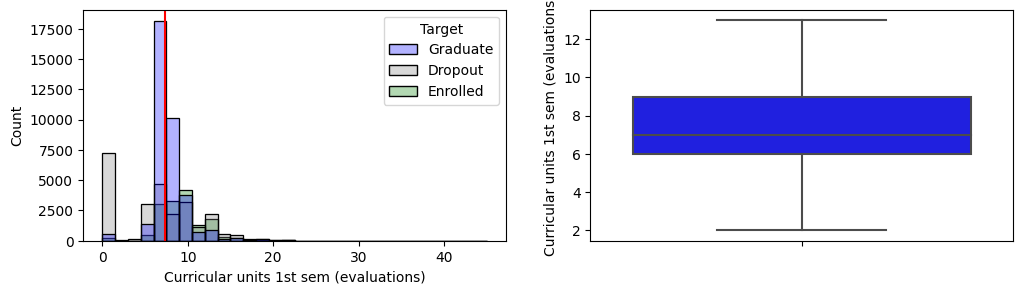

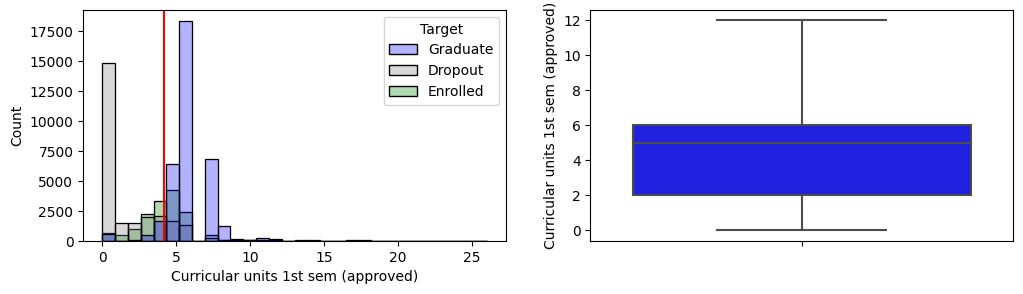

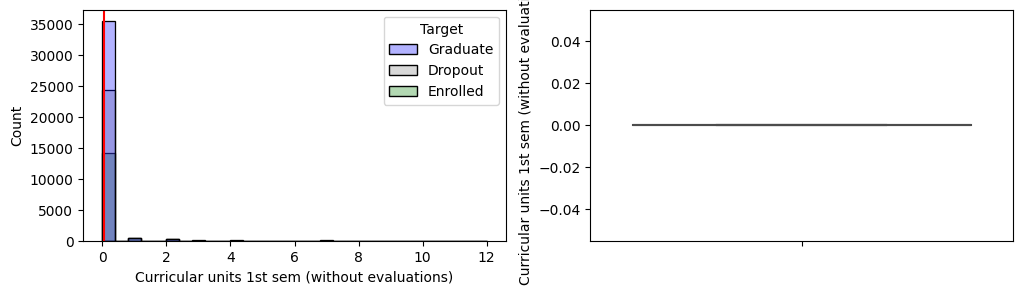

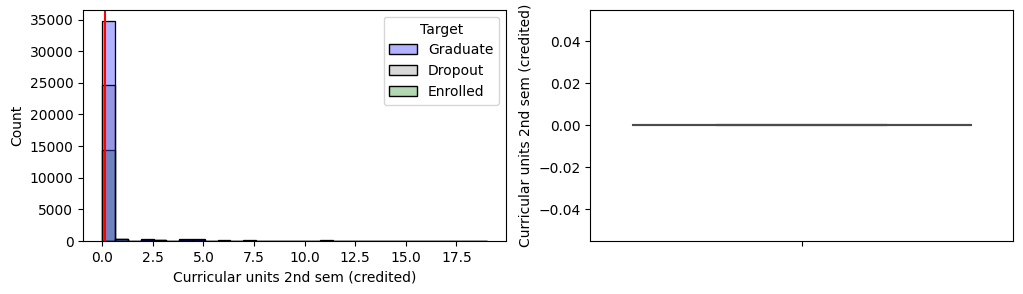

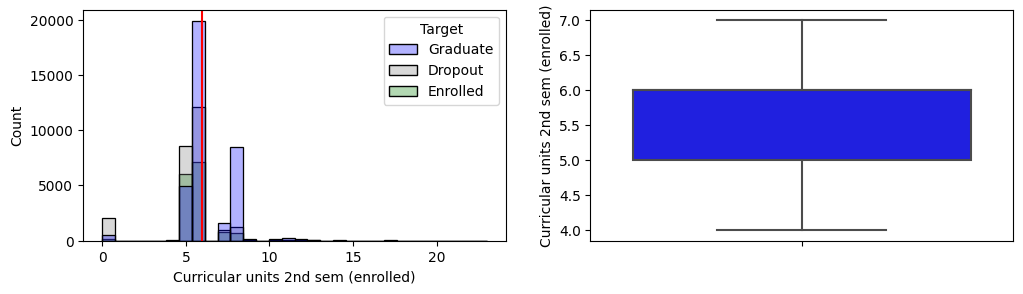

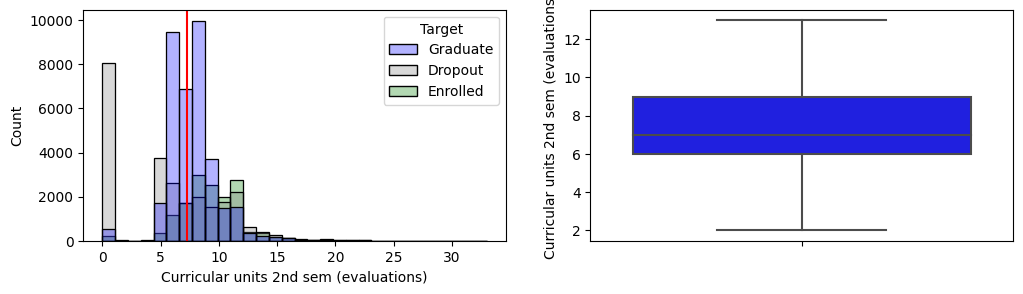

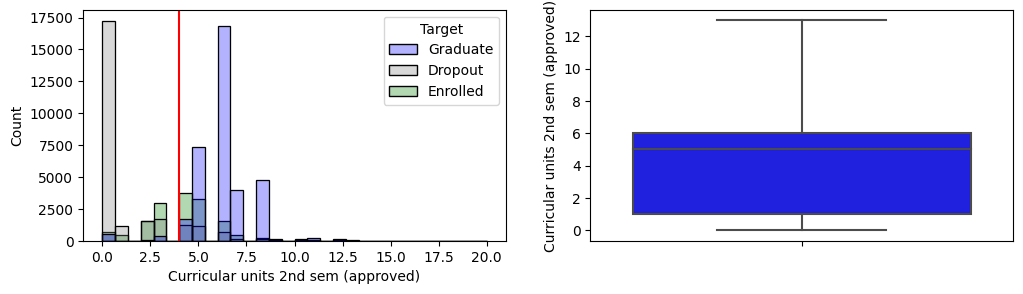

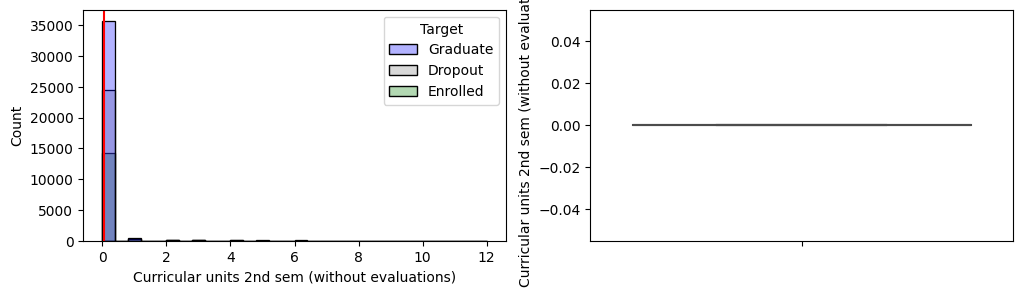

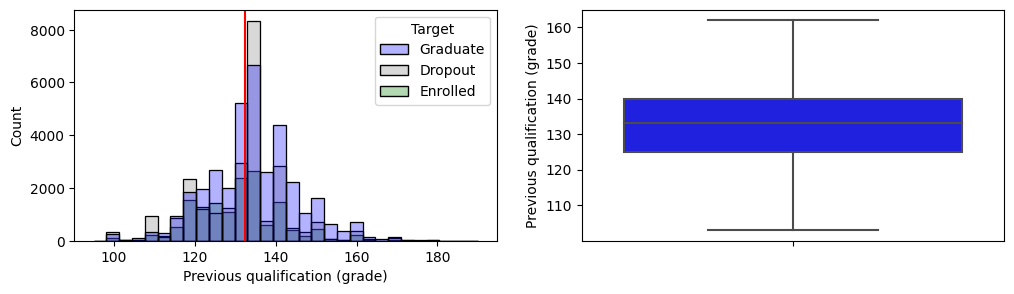

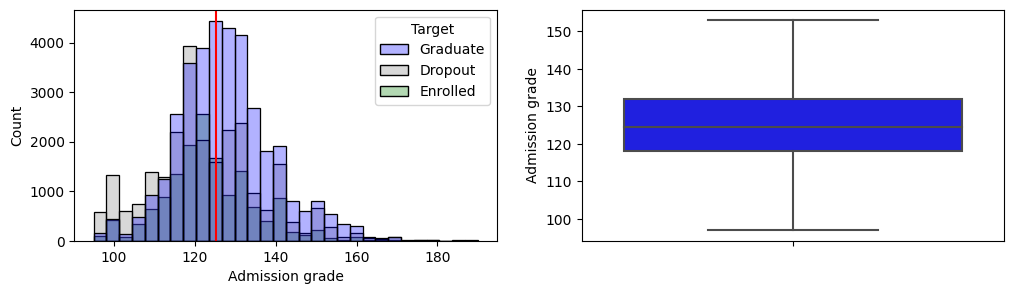

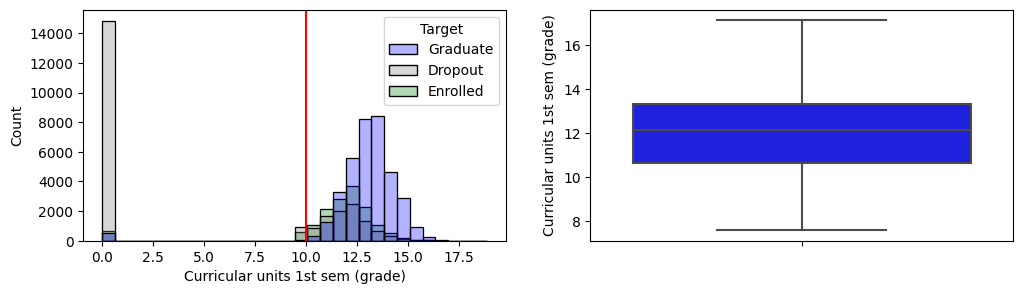

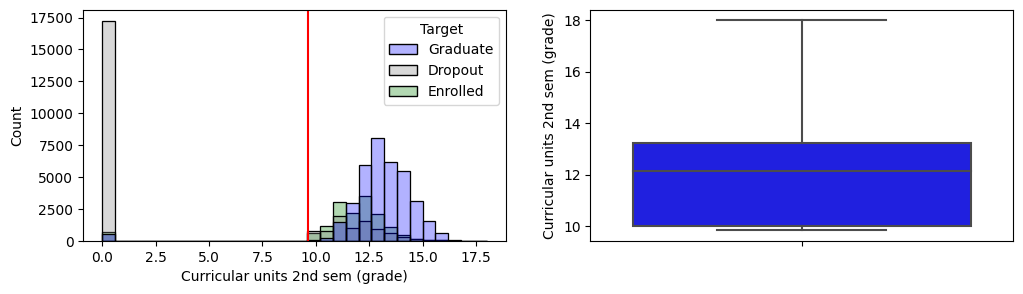

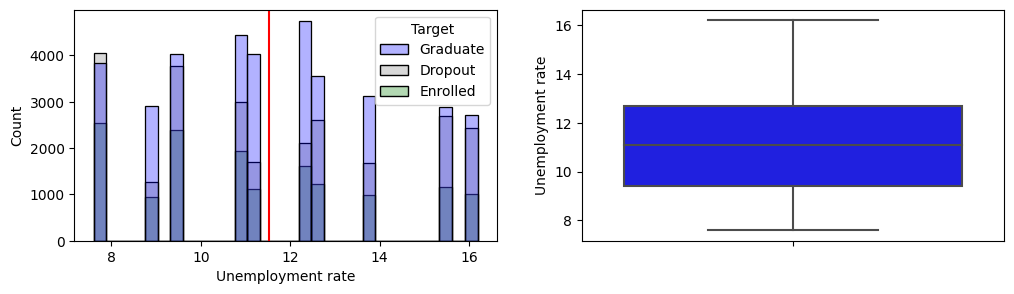

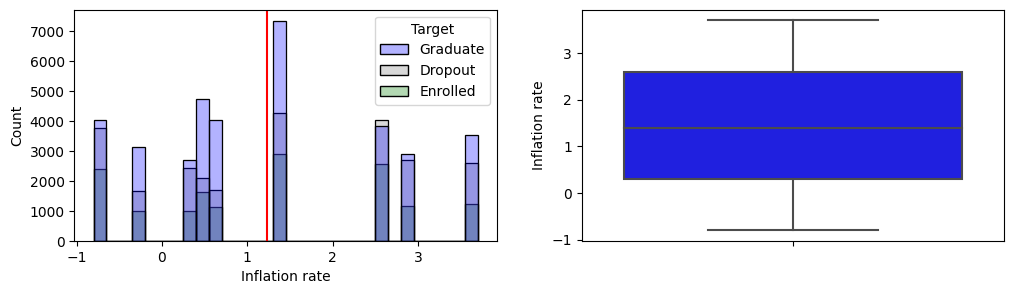

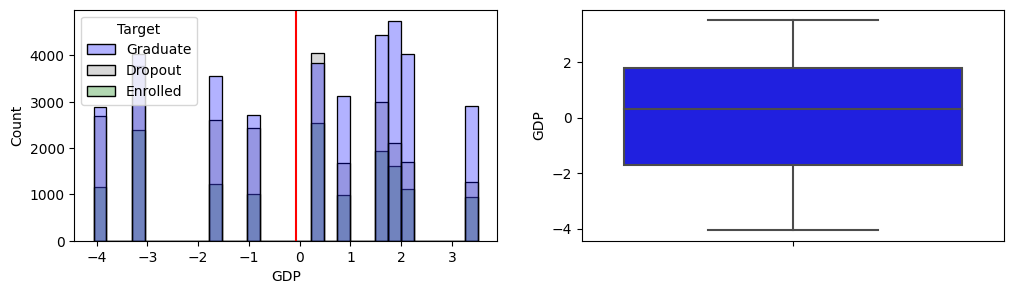

In [294]:
palette=['blue', 'grey', 'green']

for num_var in discrete_var+continous_var:    

    fig, ax = plt.subplots(1, 2, figsize=(12, 3))   
    
    # Histograms    
    sns.histplot(data=train_df_viz, 
                      x=num_var,
                      bins = 30,
                      hue = 'Target',
                      palette=palette,
                      #kde=True,
                      alpha=0.3,
                      ax=ax[0]                          
                ) 
    # Mean vertical line
    ax[0].axvline(np.mean(train_df_viz[num_var]), color="red")   
    
    # Boxplots
    sns.boxplot(data=train_df_viz, 
                     y=num_var,
                     hue = 'Target',
                     palette=palette,
                     showfliers=False,
                     ax=ax[1]
                   );

* ## Distribution - Categorical variables

In [295]:
#for cat_var in train_df_viz[categorical_var].columns:
#    plt.figure(figsize=(15,5))
#    sns.barplot(train_df_viz[cat_var].value_counts().head(5))
#    plt.legend()
#    plt.show()

* ## Power BI Viz
### [Students Academic Success](https://app.powerbi.com/view?r=eyJrIjoiOTlhOTU4NDAtNDhmZi00OTA3LTkyZWYtOTljYjczNzg4NGFhIiwidCI6IjhkODQwNjdkLTlhZDctNDU3Mi05YjEwLTEzM2QzNjQ2MmFhYSIsImMiOjF9)

![Students Overall](https://i.ibb.co/rpqSPgT/Students-Overview-viz.png, "Power BI Viz")





<img src="https://i.ibb.co/MB4VJzZ/bulb.png" width=100 height=100/>

#### **Target Variable:** 
The class is in good balance (47%, 33%, 20%). No need to apply techniques to balance the dataset;

#### **Gender:**
The number of dropouts is slightly higher for male. On the other hand, the number of females that graduates is considerably higher than those who don't;

**Marital status:** 

The highest number of students are single. Married students have a higher number of dropouts;

**Age Group:** 

Younger students graduates more often then the older ones;

**Scholarship:**

Students wih scholarships gradutes more often;

**Tuiton fees up to date:** 

Students with outstanding payment have a high number of dropout;


***
### **In short:**

#### Women are smarter than men o.O, old people (like me) dropout more offten, maybe because they have more responsibilities like: childreen, bills to pay, social life, marriage, etc (not my case). 
#### Of course students with scholarships graduates more often =D - not my case - =`(

The earth is flat
* just kidding 
*** 



*The insights are just considering this sample data, that according to UC Irvine Machine Learning Repository, comes from universities databases in Portugal.*

![Students Overall](https://i.ibb.co/W24DjYq/Students-Performance-Viz.png, "Power BI Viz")

<img src="https://i.ibb.co/MB4VJzZ/bulb.png" width=100 height=100/>

### **In short:**

#### Students who dropout are slightly below the average grade

# Feature Selection
***

### Categorical Features

#### Checking the relationship between the categorical features 

* ## Chi-Square Test

$$ \rm chi^2 = \sum \frac {(O - E)^2}{E}$$

In [296]:
from sklearn.feature_selection import chi2

# Assign the chi² values and the respective p-values to two arrays.
chi_scores  = chi2(train_df[categorical_var[0:17]], train_df['Target'])

In [297]:

# Create a data frame with the chi_scores arrays
p_values = (pd.DataFrame(
                    {'Features': train_df[categorical_var[0:17]].columns,
                     'p-value': chi_scores[1]
                    }).sort_values('p-value',ascending=False))              
                                    

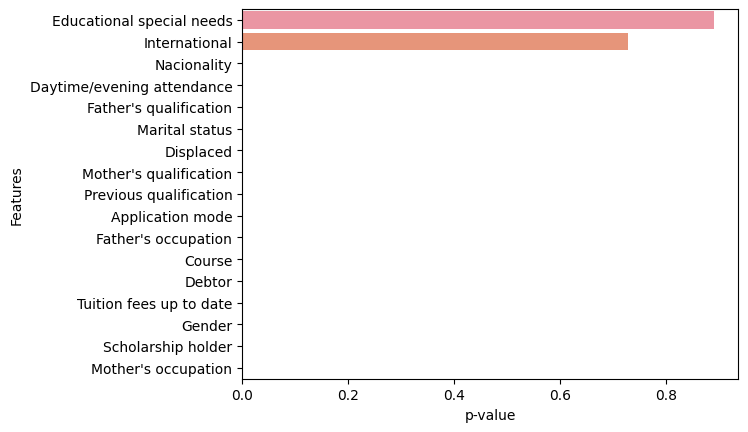

In [298]:
# Plotting the respective p-value for each category
sns.barplot(data=p_values,
            x='p-value',
            y='Features',
            orient='h'
           );

In [299]:
# Source-> https://medium.com/@ktoprakucar/how-to-calculate-the-correlation-between-categorical-and-continuous-values-dcb7abf79406

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [300]:
# Checking for association for each categorical independent variable
association = []

for col in train_df[categorical_var].columns:
    confusion_matrix = pd.crosstab(train_df[col], train_df['Target'])
    association.append({cramers_v(confusion_matrix.values),
                        col})

In [301]:
# Let's just consider the features with association greater than 0.1
selected_cat_features = [feat for corr,feat in dict(association).items() if corr > .1]

#### As we can see, the `Educational scpecial needs` and `International` are independent of the response variable, considering the signifince level of 0.05

* ## Multicolinearity
#### Checking the correlation between the continous independent variables



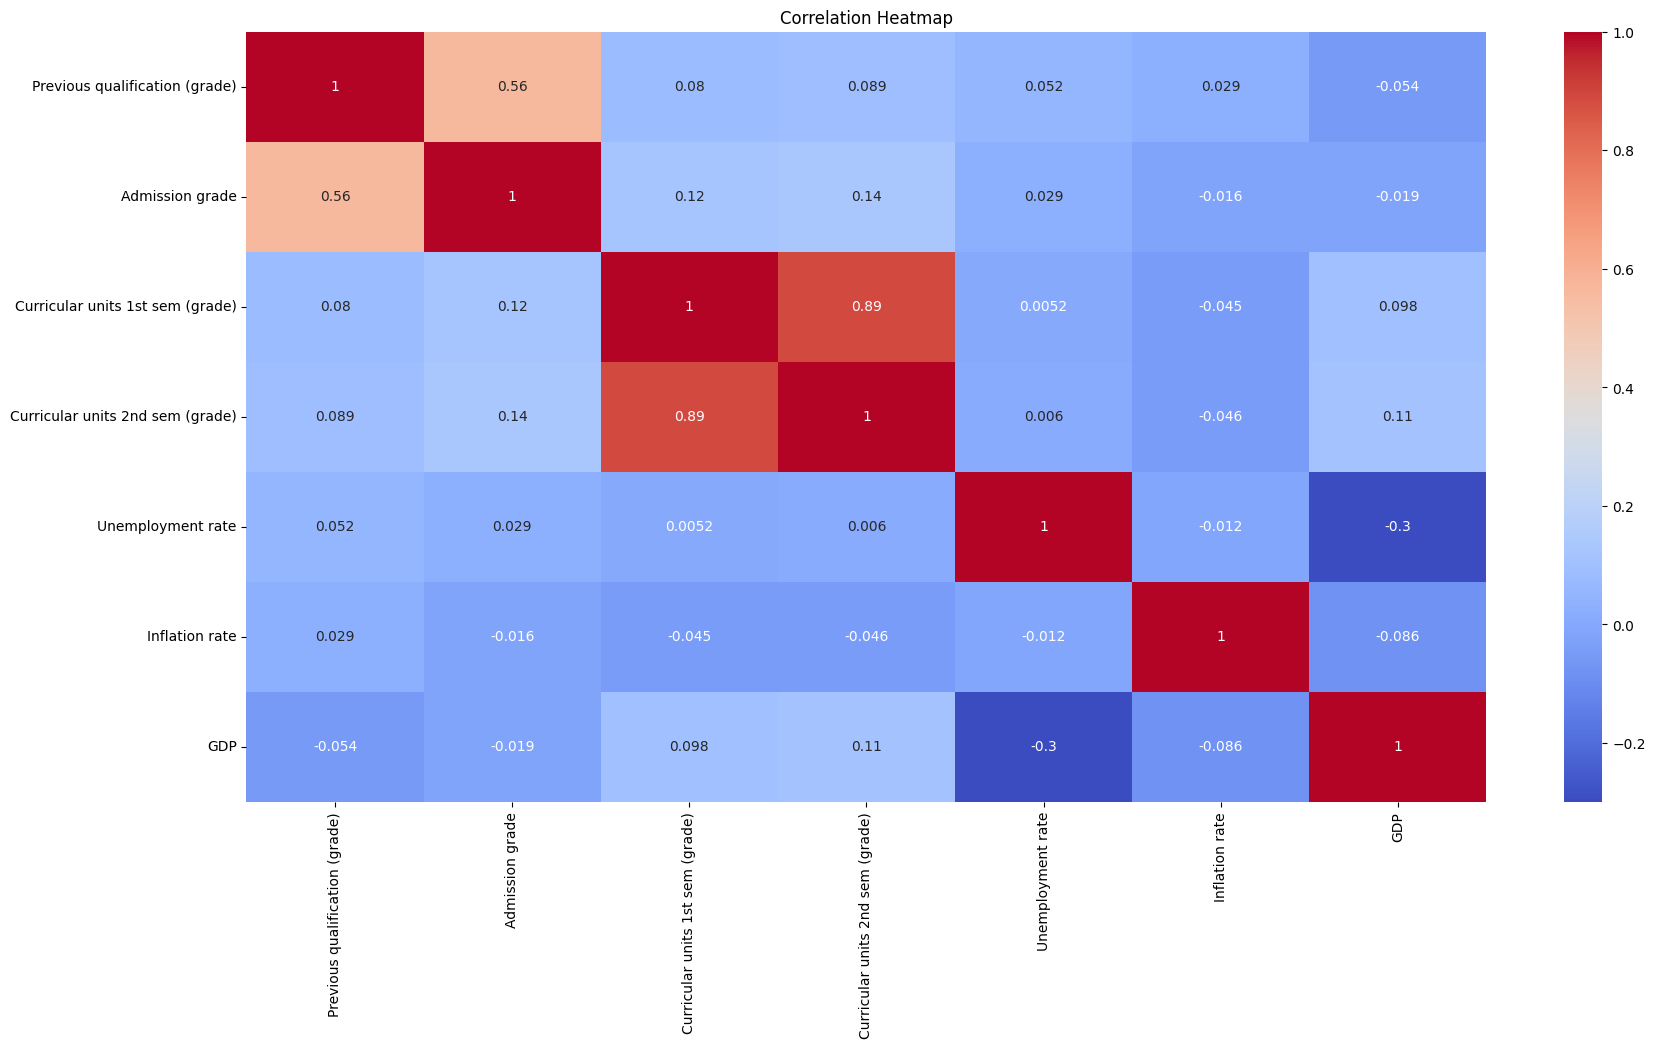

In [302]:
plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(
                train_df[continous_var], 
                columns=train_df[continous_var].columns).corr(), 
                annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

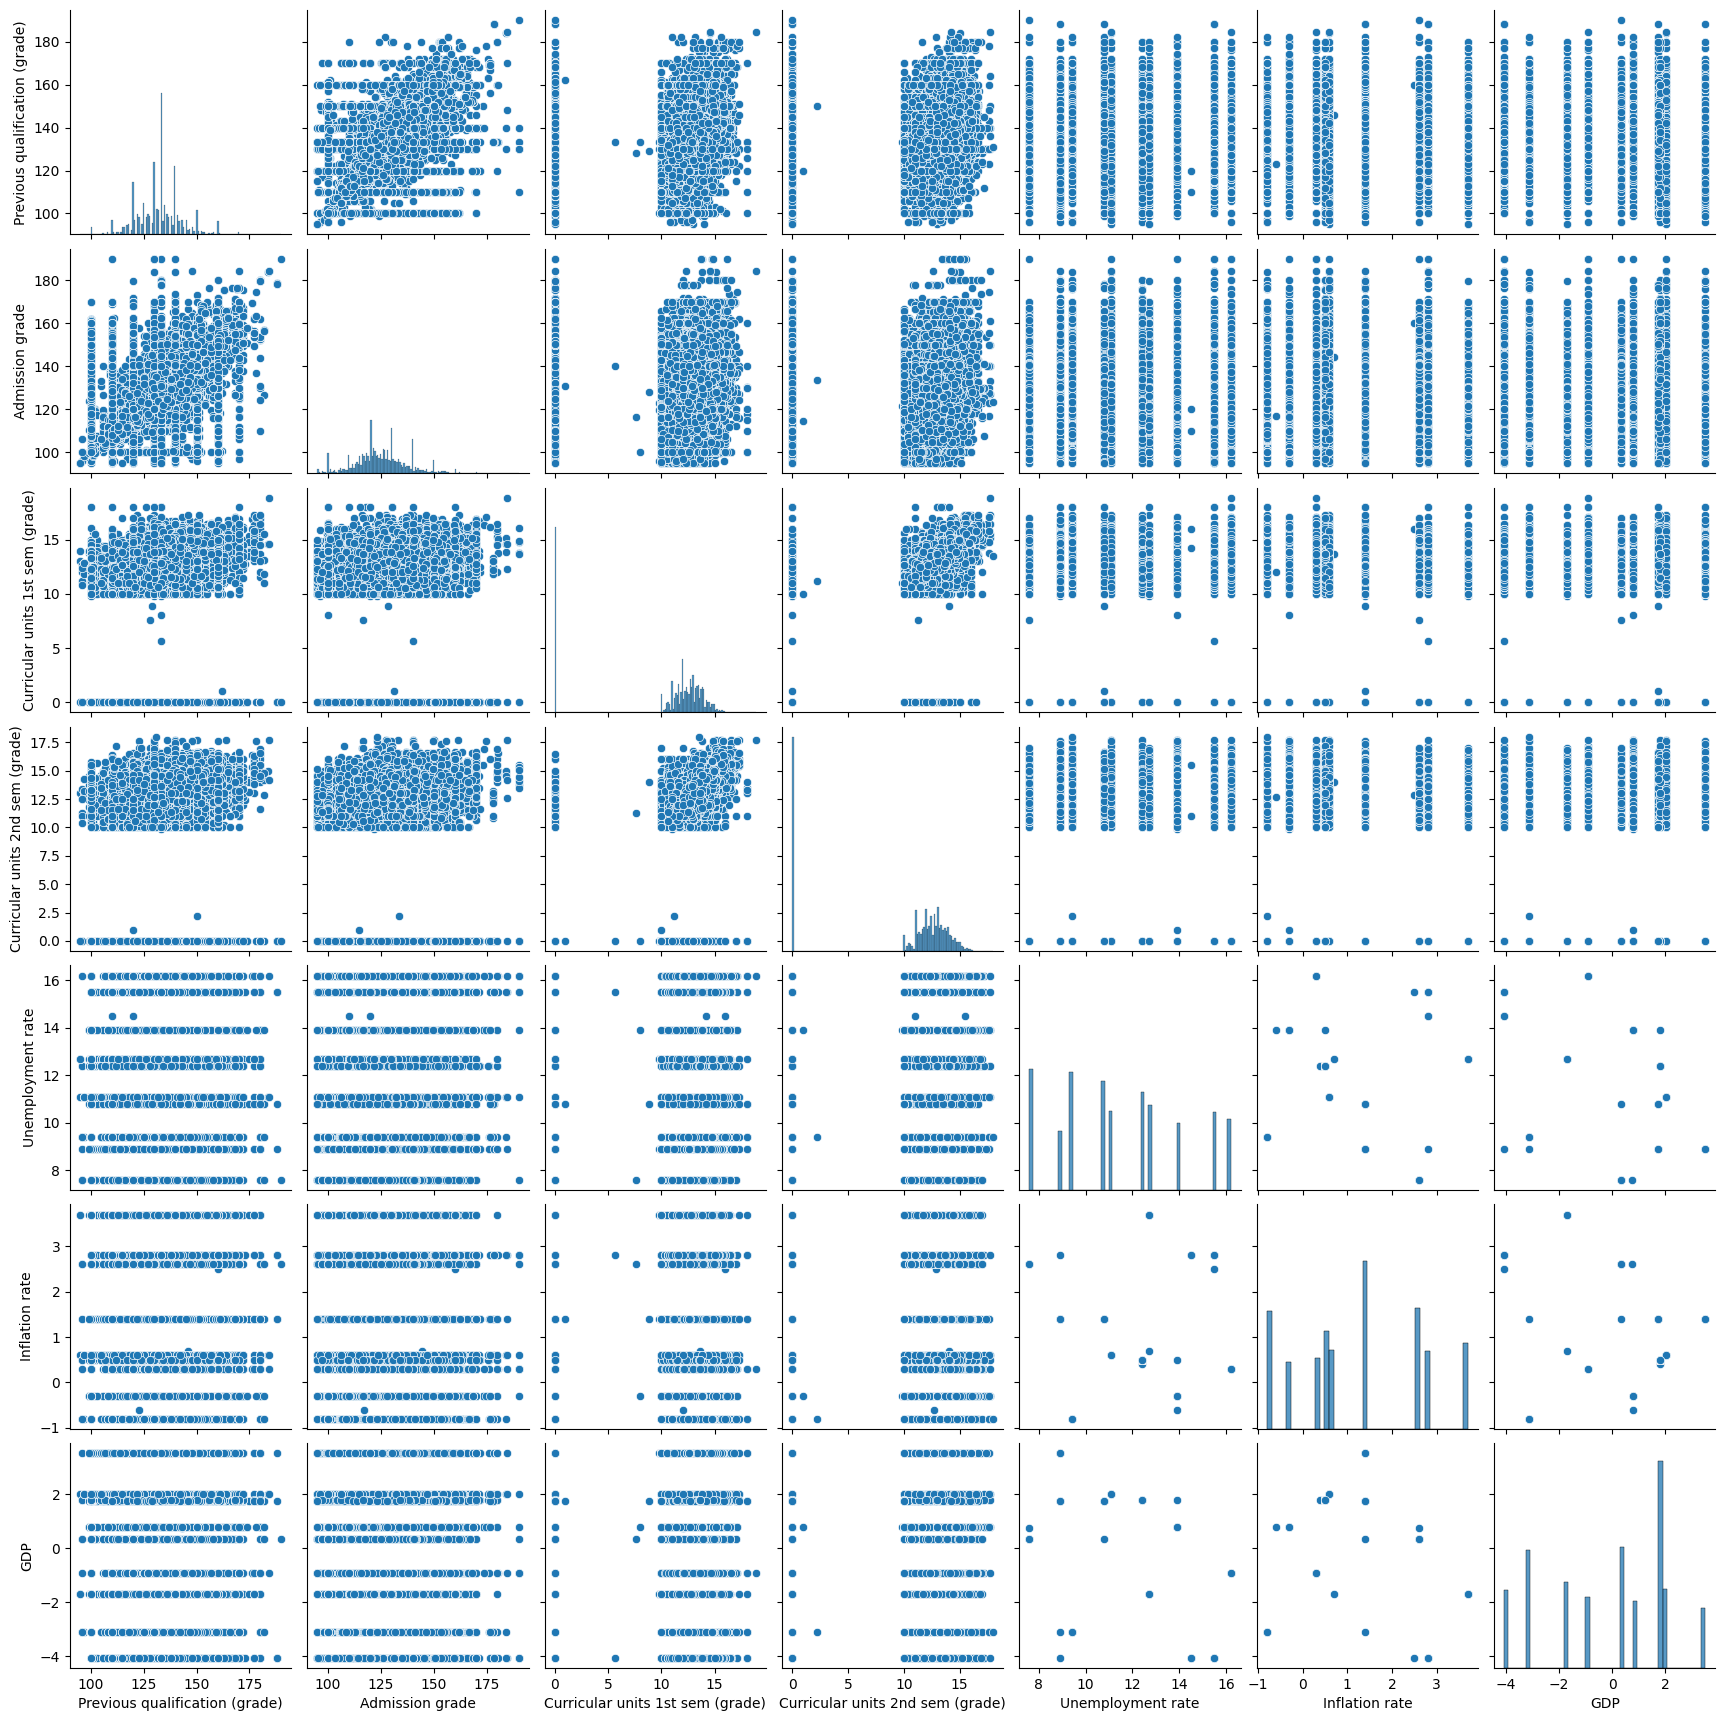

In [54]:
# Creating a pair plot with scatterplots and histograms to check multicolinearity
sns.pairplot(train_df[continous_var])

In [303]:
# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = train_df[continous_var]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Previous qualification (grade),144.917139
Admission grade,136.242681
Curricular units 1st sem (grade),21.965857
Curricular units 2nd sem (grade),19.283149
Unemployment rate,19.847008
Inflation rate,1.784653
GDP,1.105584


# Feature Engineering
***





$${\rm Grade\  average} = {\frac{{\rm Admission\ grade} + {\rm Previous\ qualification\ (grade)}}{{\rm 2}}}$$
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

⠀
$${\rm Curricular\  average} = {\frac{{\rm Curricular\ units\ 1st\ sem\ (grade)} + {\rm Curricular\ units\ 2nd\ sem\ (grade)} }{{\rm 2}}}$$
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

⠀
$${\rm Approval\ rate\  1st\  sem} = {\frac{{\rm Curricular\ units\ 1st\ sem\ (approved)}  }{{\rm Curricular\ units\ 1st\ sem\ (enrolled) }}}$$ 
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
$${\rm Approval\ rate\  2nd\  sem} = {\frac{{\rm Curricular\ units\ 2nd\ sem\ (approved)}  }{{\rm Curricular\ units\ 2nd\ sem\ (enrolled) }}}$$
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀


$${\rm Approval\ ratio} = {\frac{{\rm Approval\ rate\  1st\  sem} + {\rm Approval\ rate\  2nd\  sem } }{\rm 2}}$$



In [304]:
train_df['Grade avg'] = (train_df['Admission grade'] + train_df['Previous qualification (grade)']) / 2

train_df['Curricular units avg'] = (train_df['Curricular units 1st sem (grade)'] + train_df['Curricular units 2nd sem (grade)']) / 2

# setting 0 if curricular units (enrolled) == 0
train_df['Approval rate 1st sem'] = [0 if enr == 0 else app/enr \
                                     for app, enr in zip(train_df['Curricular units 1st sem (approved)'], \
                                                         train_df['Curricular units 1st sem (enrolled)'])]

train_df['Approval rate 2nd sem'] = [0 if enr == 0 else app/enr \
                                     for app, enr in zip(train_df['Curricular units 2nd sem (approved)'], \
                                                         train_df['Curricular units 2nd sem (enrolled)'])]


train_df['Approval ratio'] =(train_df['Approval rate 1st sem'] + train_df['Approval rate 2nd sem']) / 2 

## Selected Features

The features that are going to be considered are the ones tested by using Chi-Square that resulted in a p-value smaller than the significance level (0.5)


### Variables removed

#### Categorical:

`Educational special needs`

`International`

`Nacionality`

#### Numerical:

All variables related to Curricular units and grades, except for the extracted ones.

In [305]:
# Keep features to be used in the model
features = ['Marital status', 'Application mode', 'Application order', 'Course','Previous qualification', "Mother's qualification",\
            "Father's qualification", "Mother's occupation","Father's occupation",'Displaced', 'Debtor', 'Scholarship holder',\
            'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP', 'Grade avg','Curricular units avg', \
            'Approval ratio', 'Target']

In [306]:
# selecting relevant features
train_df_subset = train_df[features]

In [345]:
train_df_subset

,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Grade avg,Curricular units avg,Approval ratio,Target
id,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,19,5,5,0,0,1,18,11.1,0.6,2.02,124.30,13.464286,1.000000,Graduate
1,1,17,1,9238,1,19,19,9,9,1,0,0,18,11.1,0.6,2.02,122.40,5.800000,0.333333,Dropout
2,1,17,2,9254,1,3,19,2,3,0,0,0,18,16.2,0.3,-0.92,140.85,0.000000,0.000000,Dropout
3,1,1,3,9500,1,19,3,3,2,1,0,1,18,11.1,0.6,2.02,128.55,12.705625,0.937500,Enrolled
4,1,1,2,9500,1,19,37,4,9,1,0,0,18,7.6,2.6,0.32,126.05,12.933333,0.857143,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,19,1,7,5,1,0,1,18,13.9,-0.3,0.79,118.75,10.633333,0.916667,Graduate
76514,1,1,6,9254,1,1,38,4,9,1,0,0,19,9.4,-0.8,-3.12,128.30,13.437500,0.833333,Graduate
76515,5,17,1,9085,1,37,37,9,10,1,0,0,19,9.4,-0.8,-3.12,130.65,11.950000,0.900000,Enrolled


In [346]:
# label encode
train_df_subset['Target'] = train_df_subset['Target'].map({'Dropout':0, 'Enrolled':1, 'Graduate':2})

In [347]:
# Independent and dependent variables
X = train_df_subset.drop(columns='Target')
y = train_df_subset['Target']

In [348]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    stratify=y, random_state=0)

# 1. Logistic Regression (Accuracy: 0.802)
***


In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [351]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

In [352]:
lr = LogisticRegression(random_state=0)

In [353]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [354]:
y_pred = lr.predict(X_test_scaled)

In [355]:
# Accuracy score
ac_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', ac_score)

# Precision score
pc_score = precision_score(y_test, y_pred, average='weighted')
print('Precision score:', pc_score)

# Recal score
rc_score = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', rc_score)

# F1 score
F1_score = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', F1_score)

Accuracy score: 0.8027966544694197
Precision score: 0.7937609865036932
Recall score: 0.8027966544694197
F1 score: 0.7936138095110513


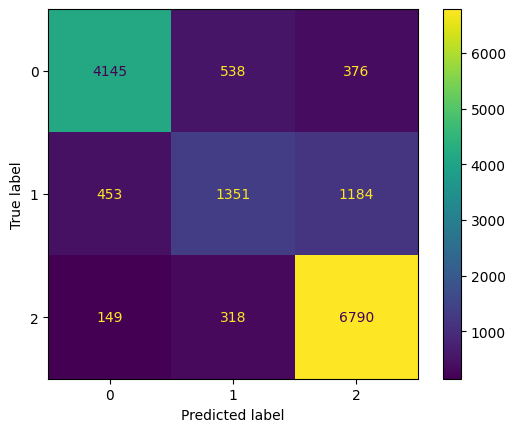

In [356]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

## Tuned Logistic Regression
***


In [ ]:
#clf_log = LogisticRegression(random_state=0)

In [ ]:
#pipe = Pipeline([('classifier', LogisticRegression(random_state=1))])


#param_grid = [
 #   {'classifier' : [LogisticRegression(random_state=1)],
  #   'classifier__penalty' : ['l1', 'l2'],
   #  'classifier__C' : np.logspace(-4, 4, 50), 
    # 'classifier__solver' : ['liblinear', 'saga']}]

In [ ]:
#clf_cv = GridSearchCV(pipe, 
 #                     param_grid=param_grid, 
  #                    cv=5, 
   #                   verbose=True, 
    #                  n_jobs=-1)

In [ ]:
# clf_cv.fit(X_train_scaled, y_train)

In [ ]:
#y_pred = clf_cv.predict(X_test_scaled)

In [357]:
lr_opt = LogisticRegression(penalty = 'l1', 
                            solver='saga',
                            C = 0.05963623316594643,
                            random_state=0)

In [358]:
lr_opt.fit(X_train_scaled, y_train)

LogisticRegression(C=0.05963623316594643, penalty='l1', random_state=0,
                   solver='saga')

In [359]:
y_pred = lr_opt.predict(X_test_scaled)

In [360]:
# Accuracy score
ac_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', ac_score)

# Precision score
pc_score = precision_score(y_test, y_pred, average='weighted')
print('Precision score:', pc_score)

# Recal score
rc_score = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', rc_score)

# F1 score
F1_score = f1_score(y_test, y_pred, average='weighted')

print('F1 score:', F1_score)

Accuracy score: 0.8029926816518558
Precision score: 0.7939972743661726
Recall score: 0.8029926816518558
F1 score: 0.7936693276613965


# 2. Random Forest (Accuracy: 0.815 - 0818)
***

In [361]:
from sklearn.ensemble import RandomForestClassifier

In [362]:
rf = RandomForestClassifier(random_state=0)

In [363]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [364]:
y_pred = rf.predict(X_test)

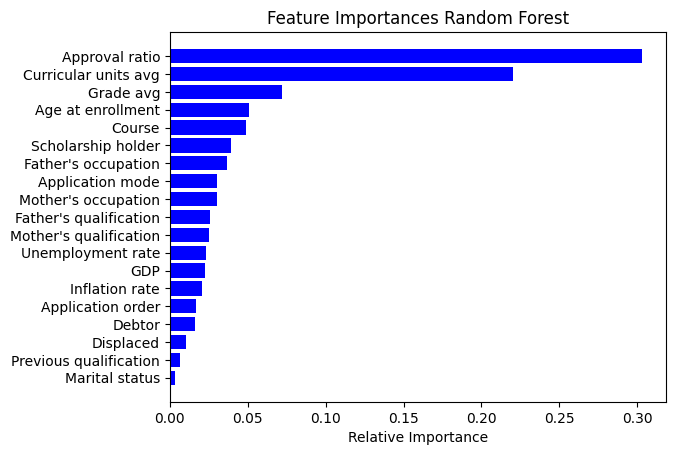

In [365]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [366]:
# Accuracy score
ac_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', ac_score)

# Precision score
pc_score = precision_score(y_test, y_pred, average='weighted')
print('Precision score:', pc_score)

# Recal score
rc_score = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', rc_score)

# F1 score
F1_score = f1_score(y_test, y_pred, average='weighted')

print('F1 score:', F1_score)

Accuracy score: 0.8150156821745949
Precision score: 0.809769136324882
Recall score: 0.8150156821745949
F1 score: 0.8103723057152905


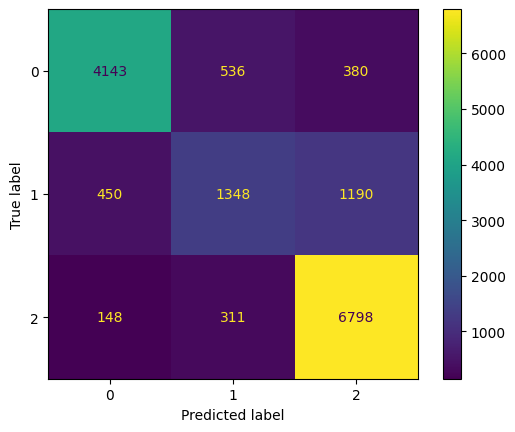

In [326]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

## Tuned Random Forest 
***

In [ ]:
#rf = RandomForestClassifier(random_state=0)

In [ ]:
#rf_cv_params = {  'n_estimators' : [50,100], 
 #                 'max_depth' : [10,50],        
  #                'min_samples_leaf' : [0.5,1], 
   #               'min_samples_split' : [0.001, 0.01],
    #              'max_features' : ["sqrt"], 
     #             'max_samples' : [.5,.9]
      #         }

In [ ]:
#rf_cv = GridSearchCV(rf, 
 #                     rf_cv_params, 
  #                    refit='f1',
   #                   n_jobs = -1)

In [ ]:
#%%time

#rf_cv.fit(X_train, y_train)

In [ ]:
#y_pred = rf_cv.predict(X_test)

In [ ]:
# Accuracy score
#ac_score = accuracy_score(y_test, y_pred)
#print('Accuracy score:', ac_score)

# Precision score
#pc_score = precision_score(y_test, y_pred, average='weighted')
#print('Precision score:', pc_score)

# Recal score
#rc_score = recall_score(y_test, y_pred, average='weighted')
#print('Recall score:', rc_score)

# F1 score
#F1_score = f1_score(y_test, y_pred, average='weighted')

#print('F1 score:', F1_score)

In [367]:
rf_best_param = {'max_depth': 100,
                 'max_features': 'sqrt',
                 'max_samples': 0.8,
                 'min_samples_split': 0.001,
                 'n_estimators': 100}

In [368]:
rf_opt = RandomForestClassifier(**rf_best_param,
                                  random_state=0)

In [369]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_samples=0.8, min_samples_split=0.001,
                       random_state=0)

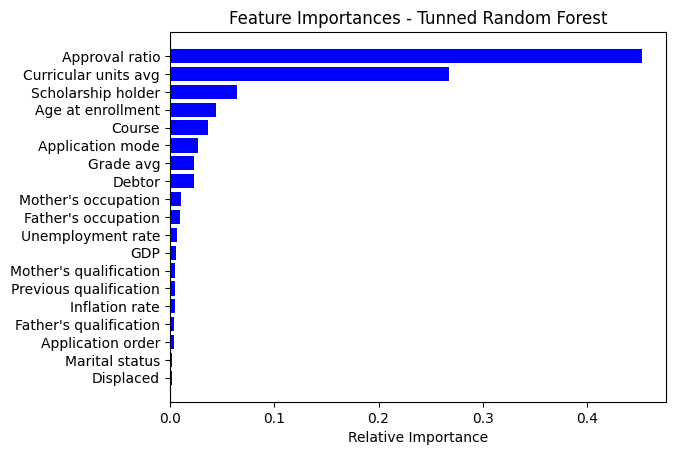

In [370]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances - Tunned Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [371]:
y_pred = rf_opt.predict(X_test)

In [332]:
# Accuracy score
ac_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', ac_score)

# Precision score
pc_score = precision_score(y_test, y_pred, average='weighted')
print('Precision score:', pc_score)

# Recal score
rc_score = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', rc_score)

# F1 score
F1_score = f1_score(y_test, y_pred, average='weighted')

print('F1 score:', F1_score)

Accuracy score: 0.8181521170935703
Precision score: 0.8137017025210911
Recall score: 0.8181521170935703
F1 score: 0.8136010846508392


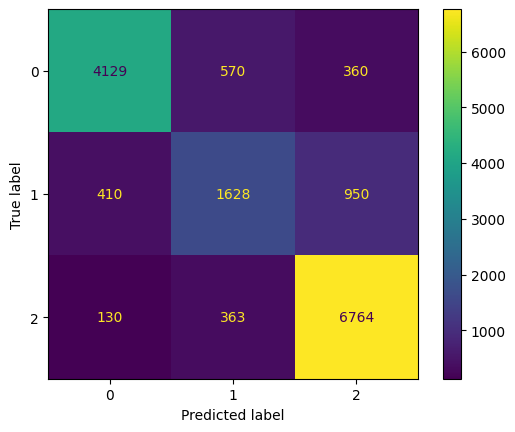

In [372]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

# 3. XGBoost (Accuracy: 0.817 - 0.824)
***

In [373]:
from xgboost import XGBClassifier

from xgboost import plot_importance

In [374]:
xgb = XGBClassifier(random_state=0)

In [376]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [377]:
y_pred = xgb.predict(X_test)

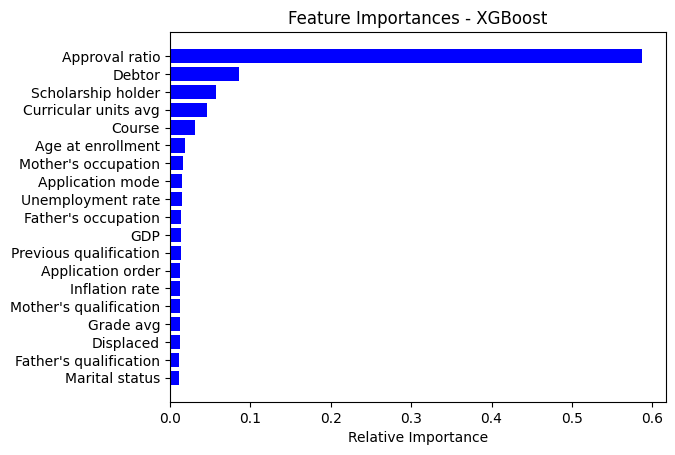

In [378]:

importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances - XGBoost')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [379]:
# Accuracy score
ac_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', ac_score)

# Precision score
pc_score = precision_score(y_test, y_pred, average='weighted')
print('Precision score:', pc_score)


# Recal score
rc_score = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', rc_score)

# F1 score
F1_score = f1_score(y_test, y_pred, average='weighted')

print('F1 score:', F1_score)

Accuracy score: 0.8175640355462624
Precision score: 0.8133796883913899
Recall score: 0.8175640355462624
F1 score: 0.8139747797581005


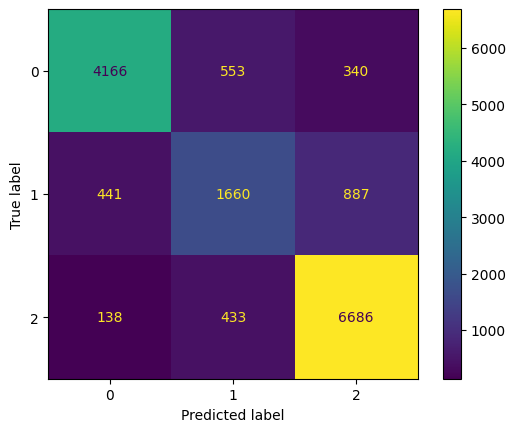

In [380]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

## Tuned XGBoost
***

In [ ]:
# Define parameters for tuning
#xgb_cv_params = { 'max_depth': [4, 6],
#                  'min_child_weight': [3, 5],
#                  'learning_rate': [0.3, 0.4,],
#                  'n_estimators': [180, 200],
#                  'subsample': [0.7, 0.8],
#                  'colsample_bytree': [0.7, 0.9]
#                 }

In [ ]:
#scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [ ]:
#xgb_cv = GridSearchCV(xgb,
#                      xgb_cv_params,
#                      scoring = scoring,
#                      cv = 5,
#                      refit = 'f1'
#               )

In [ ]:
#%%time
#xgb_cv = xgb_cv.fit(X_train, y_train)
#xgb_cv

In [381]:
xbg_best_param = {'colsample_bytree': 0.7,
                  'learning_rate': 0.12,
                  'max_depth': 4,
                  'min_child_weight': 1,
                  'n_estimators': 180,
                  'subsample': 0.7}

In [382]:
# instantiate Xboost with the best parameters
xgb_opt = XGBClassifier(**xbg_best_param, 
                          objective = 'multi:softmax', 
                          num_class=3,
                          random_state=0)

In [383]:
# Fit the model
xgb_opt = xgb_opt.fit(X_train, y_train)

In [384]:
y_pred = xgb_opt.predict(X_test)

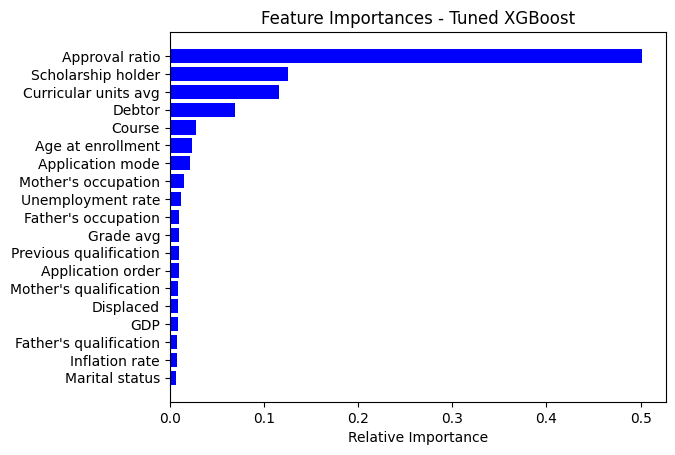

In [385]:

importances = xgb_opt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances - Tuned XGBoost')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [386]:
# Accuracy score
ac_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', ac_score)

# Precision score
pc_score = precision_score(y_test, y_pred, average='weighted')
print('Precision score:', pc_score)

# Recal score
rc_score = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', rc_score)

# F1 score
F1_score = f1_score(y_test, y_pred, average='weighted')

print('F1 score:', F1_score)

Accuracy score: 0.8231181390486147
Precision score: 0.8193491369306638
Recall score: 0.8231181390486147
F1 score: 0.8194460434051732


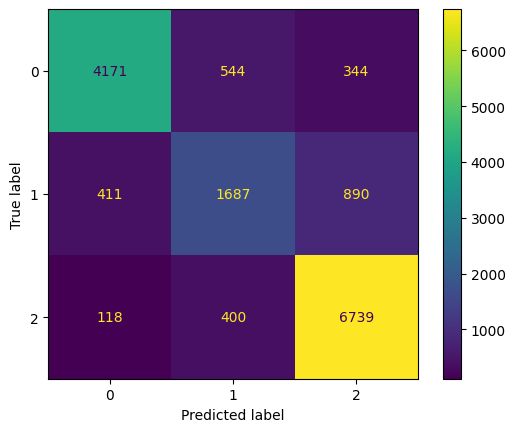

In [387]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

***
<center><img src="https://i.ibb.co/v43VqQ0/Benchmark.png" width=1000 height=800 /></center>

***

# Submission
***

In [388]:
test_df['Grade avg'] = (test_df['Admission grade'] + test_df['Previous qualification (grade)']) / 2

test_df['Curricular units avg'] = (test_df['Curricular units 1st sem (grade)'] + test_df['Curricular units 2nd sem (grade)']) / 2

# setting 0 if curricular units (enrolled) == 0
test_df['Approval rate 1st sem'] = [0 if enr == 0 else app/enr \
                                     for app, enr in zip(test_df['Curricular units 1st sem (approved)'], \
                                                         test_df['Curricular units 1st sem (enrolled)'])]

test_df['Approval rate 2nd sem'] = [0 if enr == 0 else app/enr \
                                     for app, enr in zip(test_df['Curricular units 2nd sem (approved)'], \
                                                         test_df['Curricular units 2nd sem (enrolled)'])]


test_df['Approval ratio'] =(test_df['Approval rate 1st sem'] + test_df['Approval rate 2nd sem']) / 2 

In [389]:
test_df_subset = test_df[features[0:19]]

In [390]:
y_pred = xgb_opt.predict(test_df_subset)

In [391]:
test_predictions = np.where(y_pred == 0, 'Dropout', 
                   np.where(y_pred == 1, 'Enrolled', 'Graduate'))

In [392]:
submission_df = pd.DataFrame({'id': test_df_subset.index, 
                              'Target':test_predictions})

In [393]:
submission_df.to_csv('submission.csv', index=False)
submission_df.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Dropout


***
## References:

#### Predicting Student Dropout and Academic Success
https://www.mdpi.com/2306-5729/7/11/146

#### Chi-Square Test for Feature Selection in Machine learning
https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

#### ANOVA for Feature Selection in Machine Learning
https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476

#### How to Calculate the Correlation Between Categorical and Continuous Values
https://medium.com/@ktoprakucar/how-to-calculate-the-correlation-between-categorical-and-continuous-values-dcb7abf79406

#### MCKINNEY, William. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython 2nd Edition
https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662
***